# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

df['flag_doente'] = (df['num'] != 0).astype('int64')

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [3]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)

tab['Qnt. média doentes'] = tab[1]/tab['All']
tab['Odds'] = tab[1]/tab[0]
tab['Odds ratio'] = tab['Odds']/tab.loc['All','Odds']
tab['Logito'] = np.log(tab['Odds'])
tab['WOE'] = np.log(tab['Odds ratio'])

tab

flag_doente,0,1,All,Qnt. média doentes,Odds,Odds ratio,Logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [10]:
df['cut_age'] = pd.qcut(df['age'], 5)

tab = pd.crosstab(df['cut_age'], df['flag_doente'], margins= True)

tab['Qnt. média doentes'] = tab[1]/tab['All']
tab['Odds'] = tab[1]/tab[0]
tab['Odds ratio'] = tab['Odds']/tab.loc['All','Odds']
tab['Logito'] = np.log(tab['Odds'])
tab['WOE'] = np.log(tab['Odds ratio'])
tab['Idade Média'] = df[['cut_age','age']].groupby('cut_age').mean()
tab.loc['All','Idade Média'] = df['age'].mean()

tab

flag_doente,0,1,All,Qnt. média doentes,Odds,Odds ratio,Logito,WOE,Idade Média
cut_age,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.438944


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='cut_age', ylabel='Idade Média'>

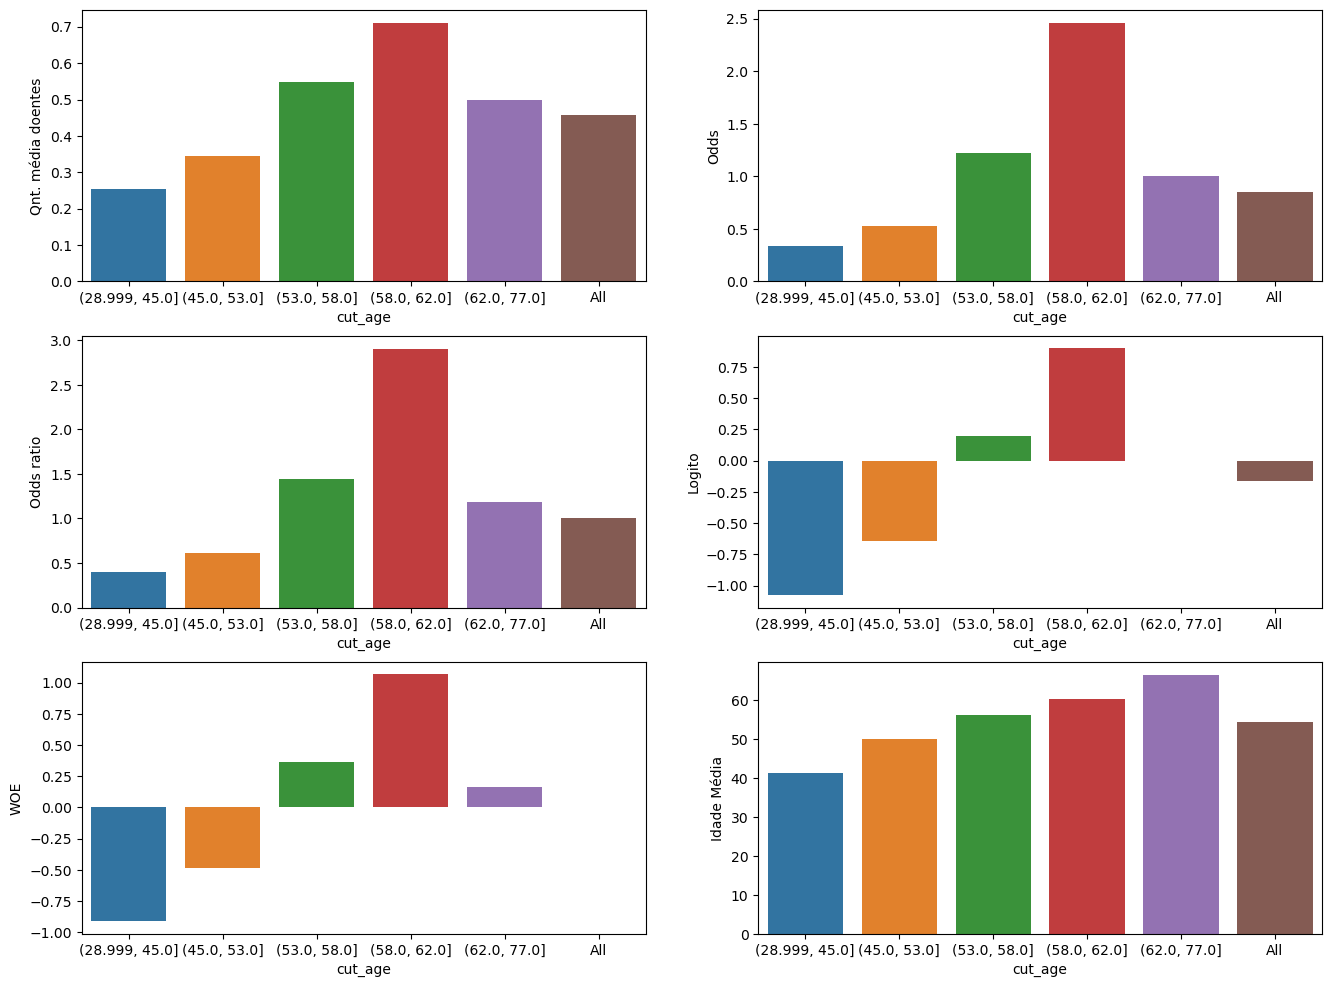

In [26]:
plt.rc('figure', figsize=(16, 12))
fig, axes = plt.subplots(3, 2)

sns.barplot(ax = axes[0,0], x=tab.index, y='Qnt. média doentes', data=tab)
sns.barplot(ax = axes[0, 1], x=tab.index, y='Odds', data=tab)
sns.barplot(ax = axes[1, 0], x=tab.index, y='Odds ratio', data=tab)
sns.barplot(ax = axes[1, 1], x=tab.index, y='Logito', data=tab)
sns.barplot(ax = axes[2, 0], x=tab.index, y='WOE', data=tab)
sns.barplot(ax = axes[2, 1], x=tab.index, y='Idade Média', data=tab)